<a href="https://colab.research.google.com/github/Manish3690/ResponseSpectra/blob/main/Newmark_Avg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
m=0.4559
k=18
c=0.2865
df= pd.read_csv('gorkha_dt 0.005.txt')
p_df=df*m*981
p=list(p_df.values.flatten())
p=np.array(p)
print(p)

u=[0]*len(p)
vel=[0]*len(p)
acc=[0]*len(p)
fs=[0]*len(p)
k_T=[0]*len(p)
k_T[0]=k
p_1=[0]*len(p)
# p=np.array([0,25,43.3013,50,43.3013,25,0,0,0,0,0])

del_t= 0.1
a_1= 188.1060
a_2= 18.5241
a_3= m

f_thres = 36




[-1.43310511e-02 -1.18572387e-02  3.92397812e-03 ...  7.47355775e+00
  6.90466622e+00  6.16678764e+00]


In [ ]:
def Newmark_normal(p, mass, c, k, del_t):
    """
    Perform dynamic analysis using the Newmark-beta method.

    Parameters:
    earthquake (list or np.array): Ground acceleration time history.
    mass (float): Mass of the system.
    damping_ratio (float): Damping ratio.
    nat_frq (float): Natural frequency of the system.
    k (float): Stiffness of the system.
    del_t (float): Time step.

    Returns:
    u_max (float): maximum displacement.
    """
    # Newmark parameters for average acceleration
    alpha = 0.5
    beta = 0.25



    #a1,a2,a3


    a1= mass*4/(del_t)**2 + c*2/(del_t)
    a2= c+ 4*mass/del_t
    a3= mass


    # System properties
    # c = 2 * damping_ratio * nat_frq * mass
    k_app = k + a1

    # Initialize arrays
    n_steps = len(p)
    u = np.zeros(n_steps+1)  # Displacement
    vel = np.zeros(n_steps+1)  # Velocity
    acc = np.zeros(n_steps+1)  # Acceleration
    p1= np.zeros(n_steps+1)

    # Effective force
    for i in range(n_steps):
      acc[i+1]= (p[i] - c* vel[i] - k* u[i])/mass
      p1[i+1] = p[i] + a1* u[i] + a2 * vel[i] + a3 * acc[i]
      u[i+1]= p1[i+1]/k_app
      vel[i+1]= 2*(u[i+1]-u[i])/del_t - vel[i]
      acc[i+1]= 4*(u[i+1] - u[i])/del_t**2 - 4*vel[i]/del_t -acc[i]



    return u, vel, acc

In [ ]:
u_linear, vel, acc = Newmark_normal(p, m, c, k, del_t)
print(u_linear, vel, acc)

[ 0.00000000e+00 -6.95378286e-05 -3.07524945e-04 ...  3.87051002e-01
  4.00808282e-01  4.06966082e-01] [ 0.         -0.00139076 -0.00336899 ...  0.13110605  0.14403955
 -0.02088356] [ 0.         -0.02781513 -0.01174945 ...  1.02890508 -0.77023513
 -2.52822703]


In [ ]:
k_T1=np.zeros(len(p))
for i in range(len(p)-1):
  u[i+1]=u_linear[i]
  fs[i+1]=fs[i]
  k_T[i+1]= k_T[i]


  p_1[i+1]= p[i+1] + a_1* u[i] + a_2 * vel[i] + a_3 * acc[i]
  Residue = p_1[i+1] - fs[i+1] - a_1 * u[i+1]
  j=0
  # print(p_1[i+1], Residue)
  while abs(Residue) >= 1.e-5:
    j+=1
    # print(j)
    k_T1[i+1] = k_T[i+1] + a_1
    del_u = Residue/ k_T1[i+1]
    # print(del_u)
    u[i+1] = u[i+1]+del_u
    fs[i+1] = fs[i] + (u[i+1] - u[i])* k
    if abs(fs[i+1])  >= 36:
      fs[i+1] = 36*np.sign(fs[i+1])
      k_T[i+1]=0
    Residue= p_1[i+1] - fs[i+1] - a_1 * u[i+1]
    print(j, Residue, u[i+1], fs[i+1])


Streaming output truncated to the last 5000 lines.
5 0.0003113780644525832 12.473580702695356 0.20348392286670602
6 -2.9795993668813026e-05 12.473582358028331 0.2035137188602505
7 2.8512004064396024e-06 12.473582199628314 0.20351086765995063
1 3.7182814365892227 12.267011008706707 -3.514770568928988
2 -0.355805055971814 12.286777956260687 -3.1589655129573337
3 0.03404724467873166 12.284886442667437 -3.193012757635838
4 -0.0032580056154074555 12.285067442979383 -3.189754752020818
5 0.00031176092807072564 12.28505012292784 -3.1900665129485795
6 -2.9832630389137194e-05 12.285051780296175 -3.190036680318549
7 2.854706053767586e-06 12.285051621701392 -3.1900395350246527
1 2.778825195527588 12.130672444172058 -5.968864730552664
2 -0.2659078047454386 12.145445099991264 -5.702956925806959
3 0.025444911302201945 12.144031493807807 -5.728401837109178
4 -0.00243484207567235 12.144166762811997 -5.725966995033762
5 0.0002329918097530026 12.144153818822566 -5.726199986843511
6 -2.2295155758911278e-0

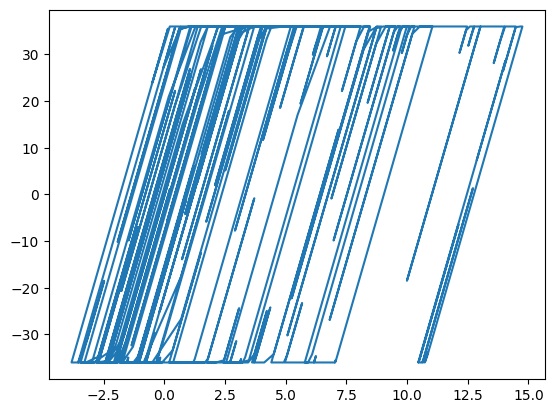

In [120]:
plt.plot(u, fs)